# 📩 SMS Spam Detector
This notebook trains a Logistic Regression model on the SMS Spam Collection Dataset and allows real-time user input to classify messages as **Spam** or **Not Spam**.

***Used Dataset =*** SMSSpamCollection

In [46]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
# Load SMS dataset
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Convert labels to numeric: ham → 0, spam → 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [61]:
df.isnull().sum()

label        0
message      0
label_num    0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   message    5572 non-null   object
 2   label_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [63]:
df.describe()

,label_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [64]:
# Convert text to numerical features (with unigrams and bigrams)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy: ',accuracy)
print('\n\nClassification Report:')
print(classification_report(y_test, y_pred))

Model Accuracy:  0.9856502242152466


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



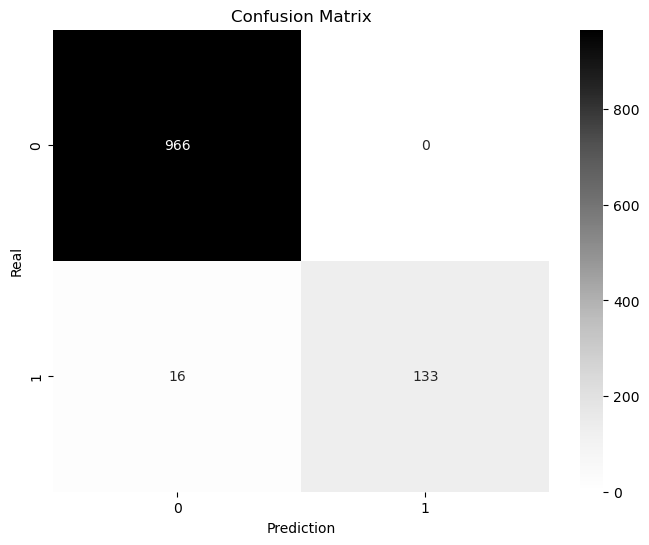

In [67]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.show()

In [68]:
# Function to predict new SMS messages
def predict_spam(message):
    msg = [message]
    msg_vector = vectorizer.transform(msg)
    pred = model.predict(msg_vector)[0]
    return 'Spam' if pred == 1 else 'Not Spam'


In [70]:
# One-time user input
inp = input("Enter a message to check: ")
result = predict_spam(inp)
print("Prediction:", result)


Enter a message to check:  hi


Prediction: Not Spam
